<a href="https://colab.research.google.com/github/Dicti93/MLSEM/blob/master/5.%20Modelling/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# scikit-learn imports for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB

# tensorflow for nn
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GaussianNoise
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

# Display Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.width', 240)

# Plotting Function
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 3))
    sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap="Blues")
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.title(title)
    plt.show()

In [26]:
# !wget 'https://raw.githubusercontent.com/Dicti93/MLSEM/master/3.%20Data%20Preparation%20/clean_data.csv' -O clean_data.csv

data = pd.read_csv('clean_data.csv')
data.shape

(780, 52)

In [91]:
# Results storage for confusion matrices, classification reports, and ROC curves
models = ["Logistic Regression", "Naive Bayes", "SVM", "Random Forest", "Gradient Boosting"]
confusion_matrices = []
roc_curves = []
accuracy = []
precision = []
recall = []
f1 = []
tpr = []
fpr = []
tnr = []
fnr = []

In [28]:
X = data.drop('Diagnosis', axis=1)  # Features
y = data['Diagnosis']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((624, 51), (156, 51), (624,), (156,))

## Logistic Regression

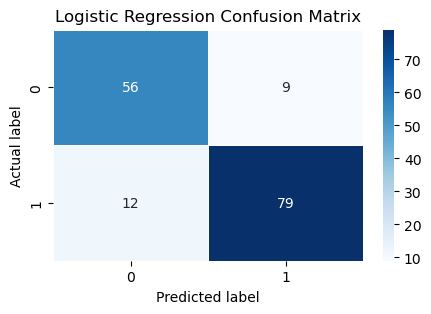

 
True Positive Rate: 0.8681
False Positive Rate: 0.1385
True Negative Rate: 0.8615
False Negative Rate: 0.1319
 
5-fold CV:
Accuracy: 0.883
Precision: 0.9077
Recall: 0.8949
F1: 0.9007


In [92]:
# Model & pipeline
lr_model = LogisticRegression(max_iter=1000, random_state=123)
lr_pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', lr_model)])

# Create confusion matrix
lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred)
confusion_matrices.append(cm_lr)

# 5 fold CV
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate Scores
cv_scores_accuracy = cross_val_score(lr_pipeline, X_train, y_train, cv=k_fold, scoring="accuracy")
mean_cv_accuracy = cv_scores_accuracy.mean()
accuracy.append(mean_cv_accuracy)

cv_scores_precision = cross_val_score(lr_pipeline, X_train, y_train, cv=k_fold, scoring="precision")
mean_cv_precision = cv_scores_precision.mean()
precision.append(mean_cv_precision)

cv_scores_recall = cross_val_score(lr_pipeline, X_train, y_train, cv=k_fold, scoring="recall")
mean_cv_recall = cv_scores_recall.mean()
recall.append(mean_cv_recall)

cv_scores_f1 = cross_val_score(lr_pipeline, X_train, y_train, cv=k_fold, scoring="f1")
mean_cv_f1 = cv_scores_f1.mean()
f1.append(mean_cv_f1)

# Calculating false negative rate
tn, fp, fn, tp = cm_lr.ravel()
true_positive_rate = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)
true_negative_rate = tn / (tn + fp)
false_negative_rate = fn / (fn + tp)

tpr.append(true_positive_rate)
fpr.append(false_positive_rate)
tnr.append(true_negative_rate)
fnr.append(false_negative_rate)

plot_confusion_matrix(cm_lr, "Logistic Regression Confusion Matrix")
print(" ")
print("True Positive Rate:", round(true_positive_rate,4))
print("False Positive Rate:", round(false_positive_rate,4))
print("True Negative Rate:", round(true_negative_rate,4))
print("False Negative Rate:", round(false_negative_rate,4))
print(" ")
print("5-fold CV:")
print("Accuracy:", round(mean_cv_accuracy,4))
print("Precision:", round(mean_cv_precision,4))
print("Recall:", round(mean_cv_recall,4))
print("F1:", round(mean_cv_f1,4))

## Naive Bayes Classifier

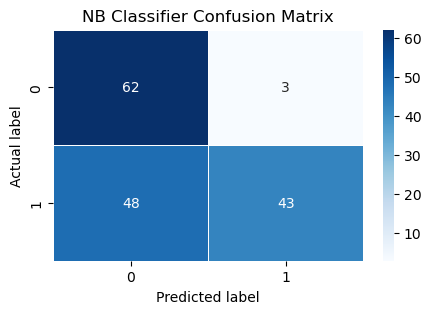

 
True Positive Rate: 0.4725
False Positive Rate: 0.0462
True Negative Rate: 0.9538
False Negative Rate: 0.5275
 
5-fold CV:
Accuracy: 0.6458
Precision: 0.9442
Recall: 0.4287
F1: 0.5891


In [93]:
# Model & pipeline
nb_model = GaussianNB()
nb_pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', nb_model)])

# Create confusion matrix
nb_pipeline.fit(X_train, y_train)
y_pred = nb_pipeline.predict(X_test)
cm_nb = confusion_matrix(y_test, y_pred)
confusion_matrices.append(cm_nb)

# 5 fold CV
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate Scores
cv_scores_accuracy = cross_val_score(nb_pipeline, X_train, y_train, cv=k_fold, scoring="accuracy")
mean_cv_accuracy = cv_scores_accuracy.mean()
accuracy.append(mean_cv_accuracy)

cv_scores_precision = cross_val_score(nb_pipeline, X_train, y_train, cv=k_fold, scoring="precision")
mean_cv_precision = cv_scores_precision.mean()
precision.append(mean_cv_precision)

cv_scores_recall = cross_val_score(nb_pipeline, X_train, y_train, cv=k_fold, scoring="recall")
mean_cv_recall = cv_scores_recall.mean()
recall.append(mean_cv_recall)

cv_scores_f1 = cross_val_score(nb_pipeline, X_train, y_train, cv=k_fold, scoring="f1")
mean_cv_f1 = cv_scores_f1.mean()
f1.append(mean_cv_f1)

# Calculating false negative rate
tn, fp, fn, tp = cm_nb.ravel()
true_positive_rate = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)
true_negative_rate = tn / (tn + fp)
false_negative_rate = fn / (fn + tp)

tpr.append(true_positive_rate)
fpr.append(false_positive_rate)
tnr.append(true_negative_rate)
fnr.append(false_negative_rate)

plot_confusion_matrix(cm_nb, "NB Classifier Confusion Matrix")
print(" ")
print("True Positive Rate:", round(true_positive_rate,4))
print("False Positive Rate:", round(false_positive_rate,4))
print("True Negative Rate:", round(true_negative_rate,4))
print("False Negative Rate:", round(false_negative_rate,4))
print(" ")
print("5-fold CV:")
print("Accuracy:", round(mean_cv_accuracy,4))
print("Precision:", round(mean_cv_precision,4))
print("Recall:", round(mean_cv_recall,4))
print("F1:", round(mean_cv_f1,4))

## Support Vector Machine

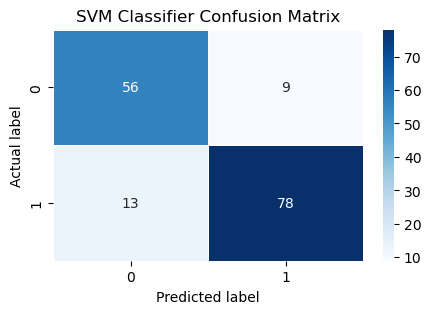

 
True Positive Rate: 0.8571
False Positive Rate: 0.1385
True Negative Rate: 0.8615
False Negative Rate: 0.1429
 
5-fold CV:
Accuracy: 0.867
Precision: 0.8966
Recall: 0.8803
F1: 0.8879


In [94]:
# Model & pipeline
svm_model = SVC(kernel='rbf', random_state=123)
svm_pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', svm_model)])

# Create confusion matrix
svm_pipeline.fit(X_train, y_train)
y_pred = svm_pipeline.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred)
confusion_matrices.append(cm_svm)

# 5 fold CV
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate Scores
cv_scores_accuracy = cross_val_score(svm_pipeline, X_train, y_train, cv=k_fold, scoring="accuracy")
mean_cv_accuracy = cv_scores_accuracy.mean()
accuracy.append(mean_cv_accuracy)

cv_scores_precision = cross_val_score(svm_pipeline, X_train, y_train, cv=k_fold, scoring="precision")
mean_cv_precision = cv_scores_precision.mean()
precision.append(mean_cv_precision)

cv_scores_recall = cross_val_score(svm_pipeline, X_train, y_train, cv=k_fold, scoring="recall")
mean_cv_recall = cv_scores_recall.mean()
recall.append(mean_cv_recall)

cv_scores_f1 = cross_val_score(svm_pipeline, X_train, y_train, cv=k_fold, scoring="f1")
mean_cv_f1 = cv_scores_f1.mean()
f1.append(mean_cv_f1)

# Calculating Rates
tn, fp, fn, tp = cm_svm.ravel()
true_positive_rate = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)
true_negative_rate = tn / (tn + fp)
false_negative_rate = fn / (fn + tp)

tpr.append(true_positive_rate)
fpr.append(false_positive_rate)
tnr.append(true_negative_rate)
fnr.append(false_negative_rate)

plot_confusion_matrix(cm_svm, "SVM Classifier Confusion Matrix")
print(" ")
print("True Positive Rate:", round(true_positive_rate,4))
print("False Positive Rate:", round(false_positive_rate,4))
print("True Negative Rate:", round(true_negative_rate,4))
print("False Negative Rate:", round(false_negative_rate,4))
print(" ")
print("5-fold CV:")
print("Accuracy:", round(mean_cv_accuracy,4))
print("Precision:", round(mean_cv_precision,4))
print("Recall:", round(mean_cv_recall,4))
print("F1:", round(mean_cv_f1,4))

## Random Forest Classifier

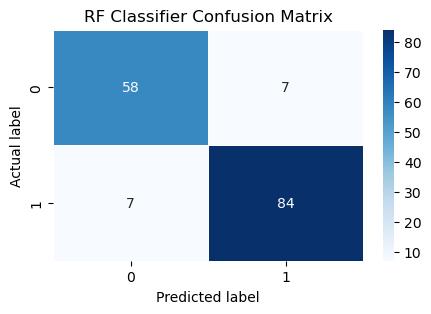

 
True Positive Rate: 0.9231
False Positive Rate: 0.1077
True Negative Rate: 0.8923
False Negative Rate: 0.0769
 
5-fold CV:
Accuracy: 0.9375
Precision: 0.9538
Recall: 0.9407
F1: 0.947


In [95]:
# Model & pipeline
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)
rf_pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', rf_model)])

# Create confusion matrix
rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred)
confusion_matrices.append(cm_rf)

# 5 fold CV
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate Scores
cv_scores_accuracy = cross_val_score(rf_pipeline, X_train, y_train, cv=k_fold, scoring="accuracy")
mean_cv_accuracy = cv_scores_accuracy.mean()
accuracy.append(mean_cv_accuracy)

cv_scores_precision = cross_val_score(rf_pipeline, X_train, y_train, cv=k_fold, scoring="precision")
mean_cv_precision = cv_scores_precision.mean()
precision.append(mean_cv_precision)

cv_scores_recall = cross_val_score(rf_pipeline, X_train, y_train, cv=k_fold, scoring="recall")
mean_cv_recall = cv_scores_recall.mean()
recall.append(mean_cv_recall)

cv_scores_f1 = cross_val_score(rf_pipeline, X_train, y_train, cv=k_fold, scoring="f1")
mean_cv_f1 = cv_scores_f1.mean()
f1.append(mean_cv_f1)

# Calculating Rates
tn, fp, fn, tp = cm_rf.ravel()
true_positive_rate = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)
true_negative_rate = tn / (tn + fp)
false_negative_rate = fn / (fn + tp)

tpr.append(true_positive_rate)
fpr.append(false_positive_rate)
tnr.append(true_negative_rate)
fnr.append(false_negative_rate)

plot_confusion_matrix(cm_rf, "RF Classifier Confusion Matrix")
print(" ")
print("True Positive Rate:", round(true_positive_rate,4))
print("False Positive Rate:", round(false_positive_rate,4))
print("True Negative Rate:", round(true_negative_rate,4))
print("False Negative Rate:", round(false_negative_rate,4))
print(" ")
print("5-fold CV:")
print("Accuracy:", round(mean_cv_accuracy,4))
print("Precision:", round(mean_cv_precision,4))
print("Recall:", round(mean_cv_recall,4))
print("F1:", round(mean_cv_f1,4))

## Gradient Boosting Classifier

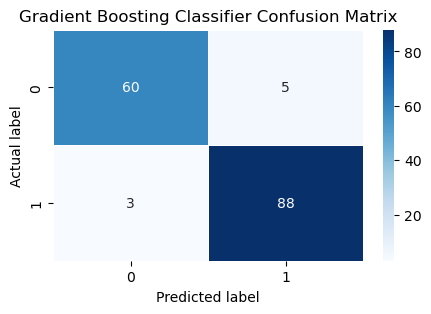

 
True Positive Rate: 0.967
False Positive Rate: 0.0769
True Negative Rate: 0.9231
False Negative Rate: 0.033
 
5-fold CV:
Accuracy: 0.9503
Precision: 0.9626
Recall: 0.9528
F1: 0.9572


In [96]:
# Model & pipeline
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=123)
gb_pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', gb_model)])

# Create confusion matrix
gb_pipeline.fit(X_train, y_train)
y_pred = gb_pipeline.predict(X_test)
cm_gb = confusion_matrix(y_test, y_pred)
confusion_matrices.append(cm_gb)

# 5 fold CV
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Calculate Scores
cv_scores_accuracy = cross_val_score(gb_pipeline, X_train, y_train, cv=k_fold, scoring="accuracy")
mean_cv_accuracy = cv_scores_accuracy.mean()
accuracy.append(mean_cv_accuracy)

cv_scores_precision = cross_val_score(gb_pipeline, X_train, y_train, cv=k_fold, scoring="precision")
mean_cv_precision = cv_scores_precision.mean()
precision.append(mean_cv_precision)

cv_scores_recall = cross_val_score(gb_pipeline, X_train, y_train, cv=k_fold, scoring="recall")
mean_cv_recall = cv_scores_recall.mean()
recall.append(mean_cv_recall)

cv_scores_f1 = cross_val_score(gb_pipeline, X_train, y_train, cv=k_fold, scoring="f1")
mean_cv_f1 = cv_scores_f1.mean()
f1.append(mean_cv_f1)

# Calculating Rates
tn, fp, fn, tp = cm_gb.ravel()
true_positive_rate = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)
true_negative_rate = tn / (tn + fp)
false_negative_rate = fn / (fn + tp)

tpr.append(true_positive_rate)
fpr.append(false_positive_rate)
tnr.append(true_negative_rate)
fnr.append(false_negative_rate)

plot_confusion_matrix(cm_gb, "Gradient Boosting Classifier Confusion Matrix")
print(" ")
print("True Positive Rate:", round(true_positive_rate,4))
print("False Positive Rate:", round(false_positive_rate,4))
print("True Negative Rate:", round(true_negative_rate,4))
print("False Negative Rate:", round(false_negative_rate,4))
print(" ")
print("5-fold CV:")
print("Accuracy:", round(mean_cv_accuracy,4))
print("Precision:", round(mean_cv_precision,4))
print("Recall:", round(mean_cv_recall,4))
print("F1:", round(mean_cv_f1,4))

## Neural Network

In [11]:
# Pipeline
nn_pipeline = Pipeline([('scaler', StandardScaler())])

# Transform the data
X_train_prepared = pipeline.fit_transform(X_train)
X_test_prepared = pipeline.transform(X_test)

# Build a simple neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_prepared.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid because of binaray classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define a callback to record training metrics
class MetricsCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        accuracy.append(logs['accuracy'])

# Fit the neural network
history = model.fit(X_train_prepared, y_train, epochs=50, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_prepared, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Retrieve the confusion matrix and ROC curve from the neural network's predictions
y_pred_nn = (model.predict(X_test_prepared) > 0.5).astype("int32")
cm_nn = confusion_matrix(y_test, y_pred_nn)
confusion_matrices.append(cm_nn)

fpr_nn, tpr_nn, _ = roc_curve(y_test, model.predict(X_test_prepared))
roc_curves.append((fpr_nn, tpr_nn))

Epoch 1/50
17/17 [==============================] - 1s 16ms/step - loss: 0.5349 - accuracy: 0.7399 - val_loss: 0.5054 - val_accuracy: 0.7213
Epoch 2/50
17/17 [==============================] - 0s 5ms/step - loss: 0.3602 - accuracy: 0.8432 - val_loss: 0.4457 - val_accuracy: 0.7377
Epoch 3/50
17/17 [==============================] - 0s 4ms/step - loss: 0.2812 - accuracy: 0.8875 - val_loss: 0.4306 - val_accuracy: 0.7705
Epoch 4/50
17/17 [==============================] - 0s 4ms/step - loss: 0.2310 - accuracy: 0.9114 - val_loss: 0.4175 - val_accuracy: 0.8033
Epoch 5/50
17/17 [==============================] - 0s 4ms/step - loss: 0.1929 - accuracy: 0.9280 - val_loss: 0.4318 - val_accuracy: 0.8033
Epoch 6/50
17/17 [==============================] - 0s 5ms/step - loss: 0.1655 - accuracy: 0.9428 - val_loss: 0.4372 - val_accuracy: 0.8361
Epoch 7/50
17/17 [==============================] - 0s 4ms/step - loss: 0.1416 - accuracy: 0.9594 - val_loss: 0.4605 - val_accuracy: 0.8525
Epoch 8/50
17/17 [=

## Summary & Model Comparison

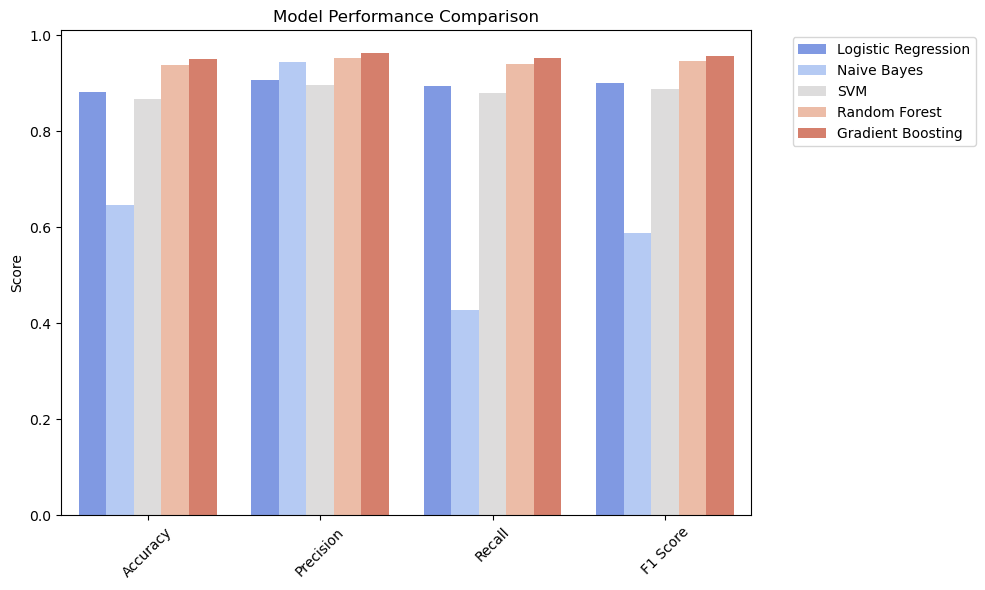

In [90]:
colors = sns.color_palette("coolwarm", len(models))

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
values = [accuracy, precision, recall, f1]

data = {"Model": models}
for metric, metric_values in zip(metrics, values):
    data[metric] = metric_values
metrics_df = pd.DataFrame(data)

metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted, x="Metric", y="Value", hue="Model", palette=colors)
plt.title("Model Performance Comparison")
plt.xlabel("")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

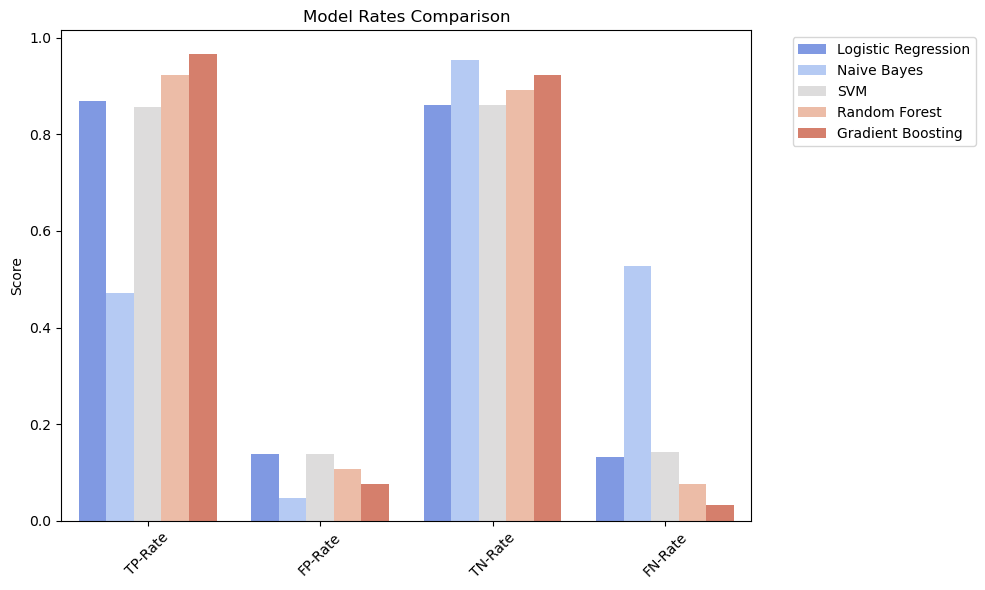

In [98]:
colors = sns.color_palette("coolwarm", len(models))

metrics = ["TP-Rate", "FP-Rate", "TN-Rate", "FN-Rate"]
values = [tpr, fpr, tnr, fnr]

data = {"Model": models}
for metric, metric_values in zip(metrics, values):
    data[metric] = metric_values
metrics_df = pd.DataFrame(data)

metrics_melted = metrics_df.melt(id_vars="Model", var_name="Metric", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted, x="Metric", y="Value", hue="Model", palette=colors)
plt.title("Model Rates Comparison")
plt.xlabel("")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## AUC, ROC ergänze ich noch...